In [1]:
import numpy as np

def float_to_list(number):
    '''
    '''
    str_num = str(number)
    
    num_list = str_num.split('.')
    sign = 1
    if len(num_list) > 1:
        pre = num_list[0]
        post = num_list[1]
    else:
        pre = num_list[0]
        post = '0'
    
    if str_num[0] == '-':
        pre = pre[1:]
        sign = -1
        
    pre  = [float(c) for c in pre[::-1]]
    post = [float(c) for c in post[:]]
    
    return [sign, pre, post]

def convert_to_base_10(real, imag, radix):
    '''
    Takes a complex number in a given complex base (radix) and returns it in base-10
    
    parameters:
        real: a list representation of the real component of a complex number
        imag: a list representation of the imaginary component of a complex number
        radix: the complex radix that the given number is assumed to be in the base of
    
    returns:
        the input complex number converted from base-radix to base-10
    '''
    
    real_sign = real[0]
    real_pre  = real[1]
    real_post = real[2]
    
    imag_sign = imag[0]
    imag_pre  = imag[1]
    imag_post = imag[2]
        
    radix_perp = -radix.imag + radix.real*1j
    
    output = 0 + 0j
    
    # convert to base-10
    for i,val in enumerate(real_pre):
        output += val * (radix**i)
    
    for i,val in enumerate(real_post):
        output += val * 1/(radix**(i+1))
        
    for i,val in enumerate(imag_pre):
        output += val * (radix_perp**i)
        
    for i,val in enumerate(imag_post):
        output += val * 1/(radix_perp**(i+1))
        
    return output.real * real_sign + output.imag * imag_sign * 1j

In [ ]:
x = float_to_list(1.1)
y = float_to_list(0)

print(x)
print(y)

phi = 1.1 + 0j

for _ in range(1000):
    phi = convert_to_base_10(x, y, phi)
    
print(phi)

In [2]:
from itertools import product
from tqdm import tqdm

n    = 501
m    = 1000
name = '251k_corrected'

In [ ]:
X, Y   = np.meshgrid(np.linspace(-2,2,n),np.linspace(-2,2,n))
output = np.zeros((100,n,n), dtype = np.complex)

output[0,:,:] = X + Y*1j

x = [[float_to_list(X[i,j]) for j in range(n)] for i in range(n)]
y = [[float_to_list(Y[i,j]) for j in range(n)] for i in range(n)]

In [ ]:
for i,j in tqdm(product(range(n), range(n)), total = n*n):
    for _ in range(m-99):
        output[0,i,j]   = convert_to_base_10(x[i][j],y[i][j],output[0,i,j])
    for k in range(99):
        output[k+1,i,j] = convert_to_base_10(x[i][j],y[i][j],output[k,i,j])

In [ ]:
np.save('out' + name + '.npy', output)

In [5]:
output = np.load('./out251k_corrected.npy')
name = '251k_corrected'

In [6]:
# fft
import scipy.fft as fft
2
out_fft     = fft.fft(output, axis = 0)
out_fftfreq = fft.fftfreq(100, d = 1/100)

freqs = np.argmax(out_fft[:50,:,:], axis = 0)

print(freqs)

[[ 1 34 29 ...  0  0  0]
 [ 1 34  4 ...  0  0  5]
 [44 20  1 ...  0  0 17]
 ...
 [17 33 16 ...  0  0  0]
 [28 32 32 ...  0  0  0]
 [ 1 34 31 ...  0  0  0]]


<ipython-input-7-239f59d878f2>:24: RuntimeWarning: divide by zero encountered in log
  diverging = np.ma.masked_where((out_plot.real <= 2) & (out_plot.real >= -2) & (out_plot.imag <= 2) & (out_plot.imag >= -2), np.log(np.log(np.absolute(out_plot))))
<ipython-input-7-239f59d878f2>:24: RuntimeWarning: invalid value encountered in log
  diverging = np.ma.masked_where((out_plot.real <= 2) & (out_plot.real >= -2) & (out_plot.imag <= 2) & (out_plot.imag >= -2), np.log(np.log(np.absolute(out_plot))))


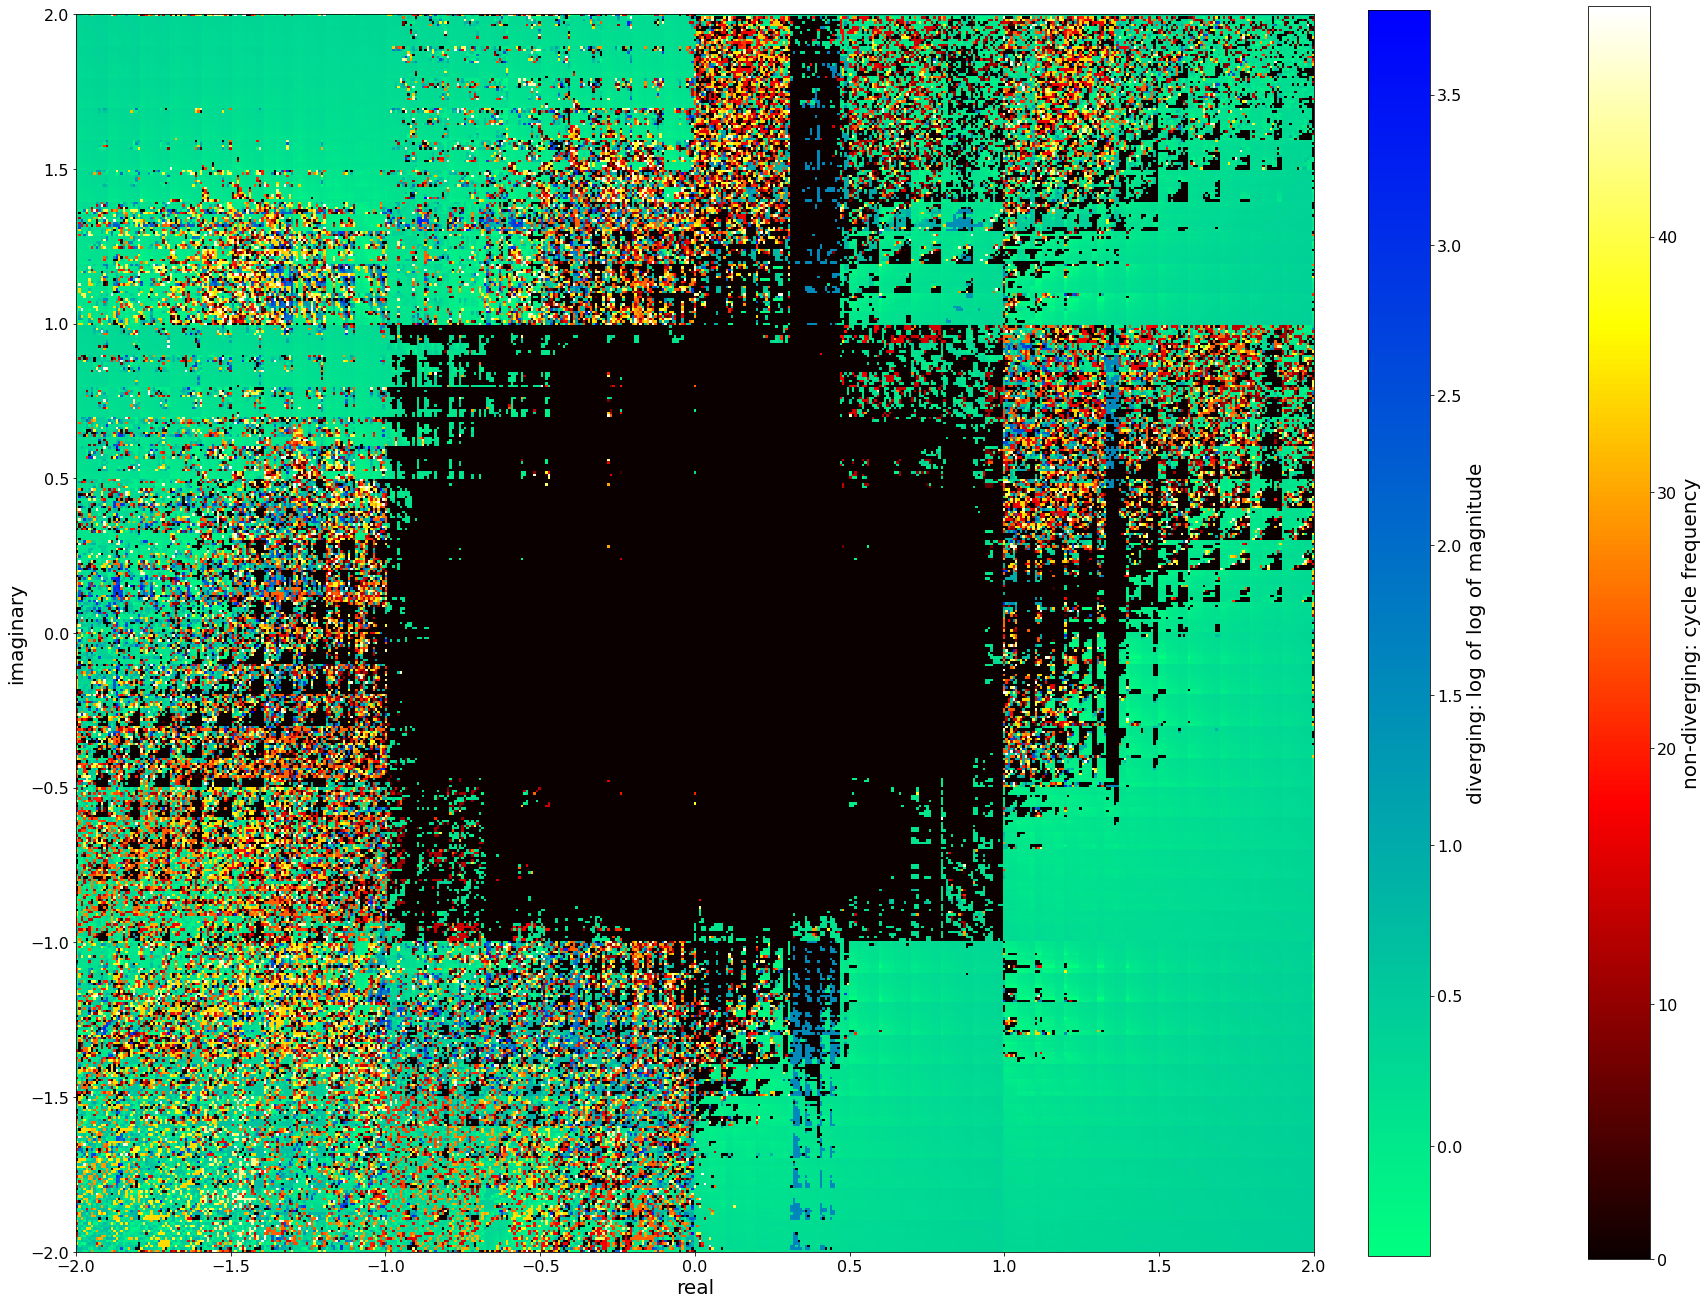

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

# plot font params
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


out_plot = np.ones((n,n), dtype = np.complex) * output[-1,:,:]

fig = plt.figure(figsize = (24,20))

non_diverging = np.ma.masked_where((out_plot.real > 2) | (out_plot.real < -2) | (out_plot.imag > 2) | (out_plot.imag < -2), freqs)
diverging = np.ma.masked_where((out_plot.real <= 2) & (out_plot.real >= -2) & (out_plot.imag <= 2) & (out_plot.imag >= -2), np.log(np.log(np.absolute(out_plot))))

cmap = copy.copy(mpl.cm.get_cmap("hot"))
im = plt.imshow(non_diverging, cmap=cmap, interpolation = 'none', extent = [-2,2,-2,2])
cbar = fig.colorbar(im, fraction=0.0398, pad=0.1)
cbar.ax.set_ylabel('non-diverging: cycle frequency')

cmap2 = copy.copy(mpl.cm.get_cmap("winter_r"))
im2 = plt.imshow(diverging, cmap=cmap2, interpolation = 'none', extent = [-2,2,-2,2])
cbar2 = fig.colorbar(im2, fraction=0.046, pad=0.04)
cbar2.ax.set_ylabel('diverging: log of log of magnitude')

plt.xlabel('real')
plt.ylabel('imaginary')

fig.tight_layout()
plt.savefig('out' + name + '.png', facecolor = 'w', edgecolor = 'w')
plt.show()

<ipython-input-8-8345300a4e4f>:5: RuntimeWarning: divide by zero encountered in log
  gtz = np.ma.masked_where(np.absolute(out_plot) <= 2, np.log(np.log(np.absolute(out_plot))))
<ipython-input-8-8345300a4e4f>:5: RuntimeWarning: invalid value encountered in log
  gtz = np.ma.masked_where(np.absolute(out_plot) <= 2, np.log(np.log(np.absolute(out_plot))))


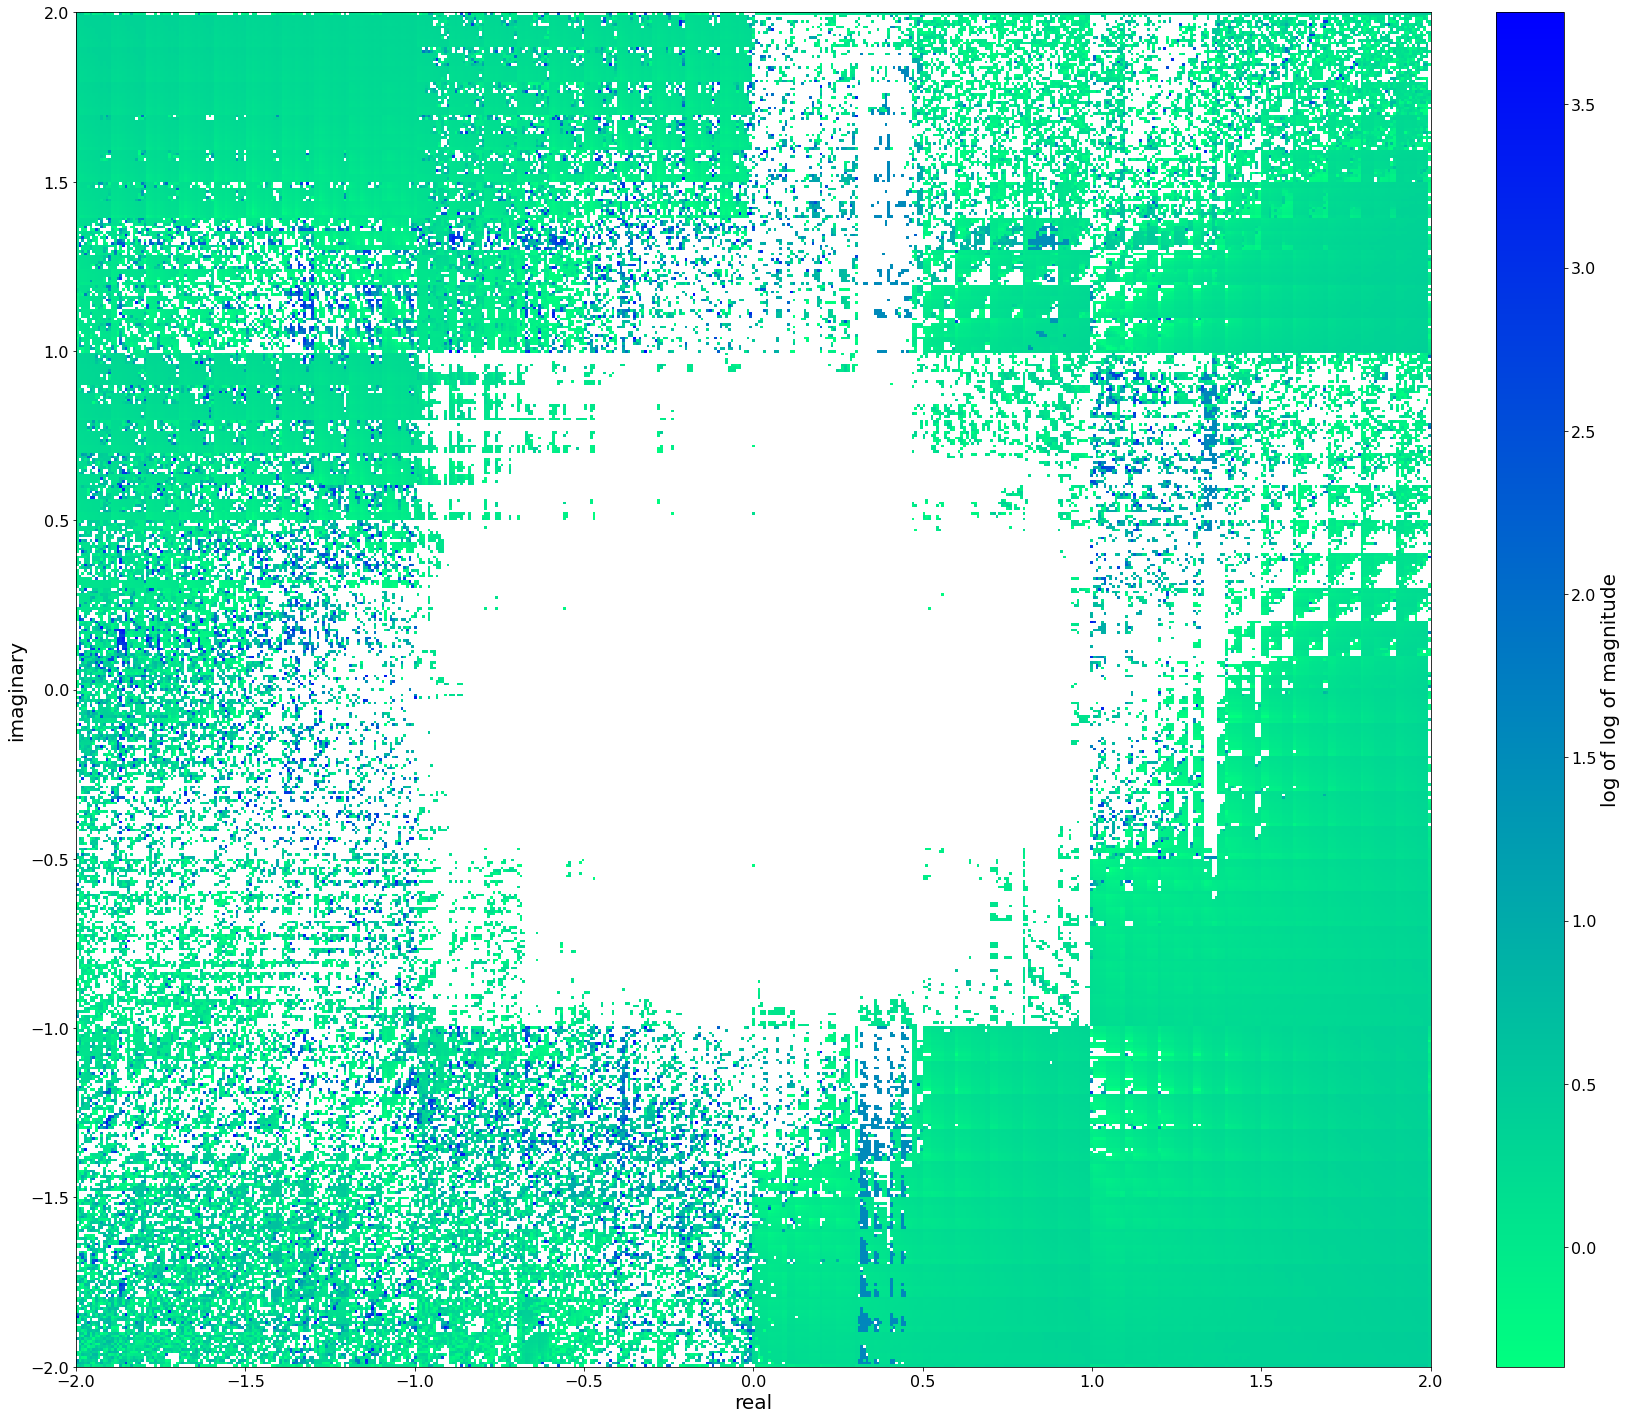

In [8]:
fig = plt.figure(figsize = (24,20))

cmap2 = copy.copy(mpl.cm.get_cmap("winter_r"))

gtz = np.ma.masked_where(np.absolute(out_plot) <= 2, np.log(np.log(np.absolute(out_plot))))

im2 = plt.imshow(gtz, cmap=cmap2, interpolation = 'none', extent = [-2,2,-2,2])
cbar2 = fig.colorbar(im2, fraction=0.046, pad=0.04)
cbar2.ax.set_ylabel('log of log of magnitude')

plt.xlabel('real')
plt.ylabel('imaginary')

fig.tight_layout()
plt.savefig('out' + name + '_mag_only.png', facecolor = 'w', edgecolor = 'w')
plt.show()

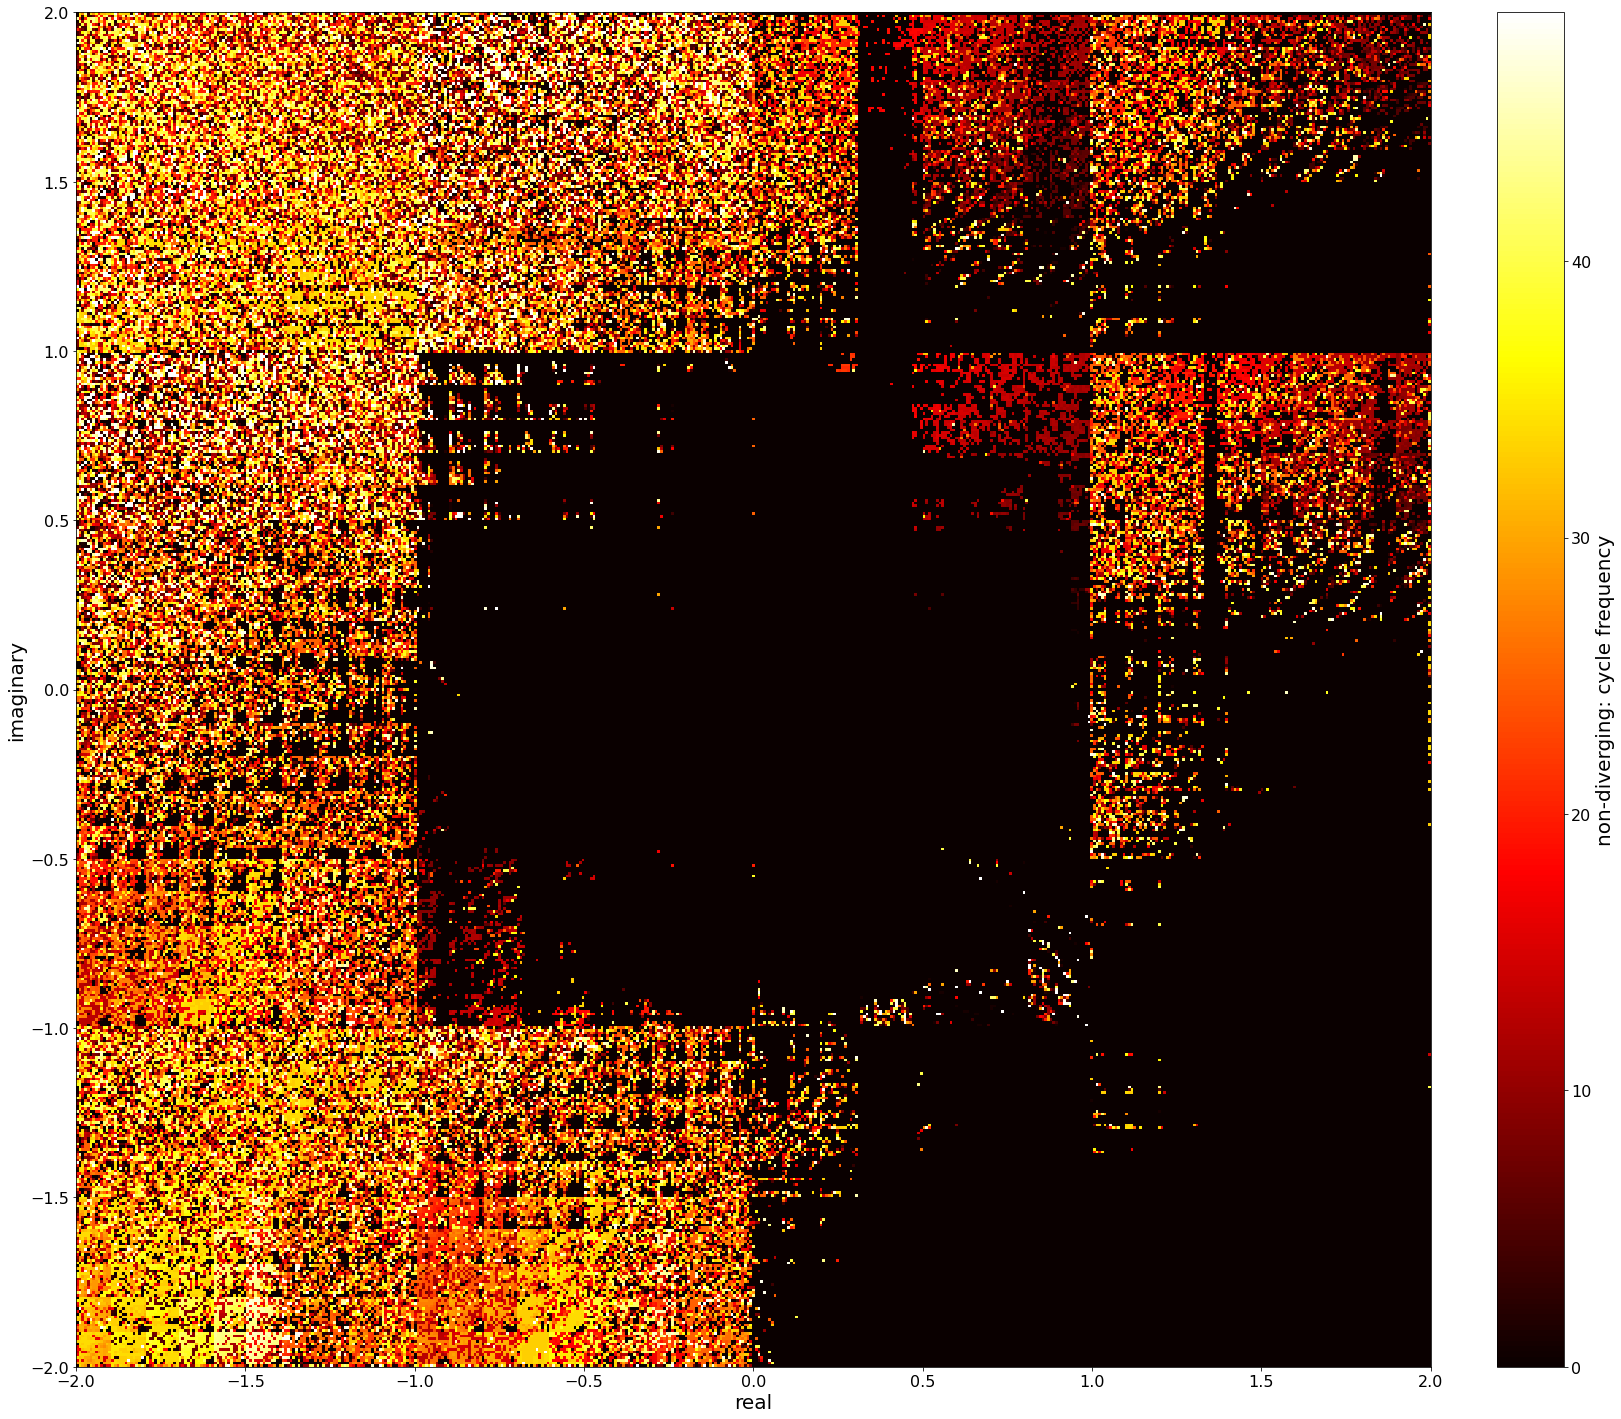

In [9]:
fig = plt.figure(figsize = (24,20))

cmap = copy.copy(mpl.cm.get_cmap("hot"))
im = plt.imshow(freqs, cmap=cmap, interpolation = 'none', extent = [-2,2,-2,2])
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('non-diverging: cycle frequency')

plt.xlabel('real')
plt.ylabel('imaginary')

fig.tight_layout()
plt.savefig('out' + name + '_freq_only.png', facecolor = 'w', edgecolor = 'w')
plt.show()